<a href="https://colab.research.google.com/github/Noraswg/Machine-learning-projects/blob/main/Copy_of_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load and Explore the Dataset

::#Case Study: House Price

The dataset represents a synthetic collection of house-related features and their corresponding prices. It contains 1000 samples, with each sample having the following features:

- Size: The size of the house
- Bedrooms: The number of bedrooms in the house
- Bathrooms: The number of bathrooms in the house
- Location: A feature representing the location of the house
- YearBuilt: The year the house was built
- RoofType: The type of roof on the house
- Price: The price of the house

In [26]:
#read dataset
import numpy as np
import pandas as pd
data = pd.read_csv('/content/Copy of house_prices_dataset.csv')
data

,Size,Bedrooms,Bathrooms,Location,YearBuilt,RoofType,Price
0,-0.325611,0.257199,0.007880,-0.164335,-0.240665,0.212093,-16.984913
1,-0.202193,1.277665,0.547097,-0.217681,-0.591571,1.098777,24.031693
2,-2.153731,0.975713,0.685858,0.446982,0.000756,-0.638586,57.305959
3,-0.939880,-1.304470,0.366598,-0.513867,0.669673,-1.059214,-81.049670
4,-0.570351,1.223083,0.352505,-1.820603,-0.258854,0.270057,-127.396000
...,...,...,...,...,...,...,...
995,NaN,0.689164,-0.273729,0.149598,-0.683634,0.097827,13.634300
996,-0.564079,-1.021233,0.243801,-1.280304,0.708356,0.872457,-138.161669
997,-0.981166,-1.725807,1.194109,-0.464404,-0.677565,0.462061,-94.896020
998,NaN,1.158596,0.963376,0.822060,-0.820682,1.896793,133.087712


Let's explore the dataset to better know what we're dealing with

In [27]:
# Question 1:
# Get the shape of the dataset
data.shape


(1000, 7)

In [28]:
# Check the data types of the columns
print (data.dtypes)

Size         float64
Bedrooms     float64
Bathrooms    float64
Location     float64
YearBuilt    float64
RoofType     float64
Price        float64
dtype: object


## Deeper Exploration

In [29]:
# Question 2:
# Check for missing values
print (data.isnull().sum())

Size         200
Bedrooms     100
Bathrooms      0
Location       0
YearBuilt      0
RoofType       0
Price          0
dtype: int64


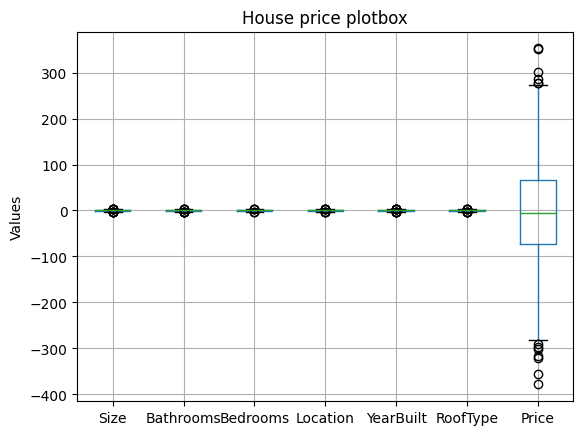

In [30]:
import matplotlib.pyplot as plt
# Create a box plot for outlier detection
data.boxplot(column=['Size' , 'Bathrooms' , 'Bedrooms' , 'Location' , 'YearBuilt' , 'RoofType' , 'Price'] )
plt.title('House price plotbox')
plt.ylabel ('Values')
plt.show()

Text(0, 0.5, 'Values')

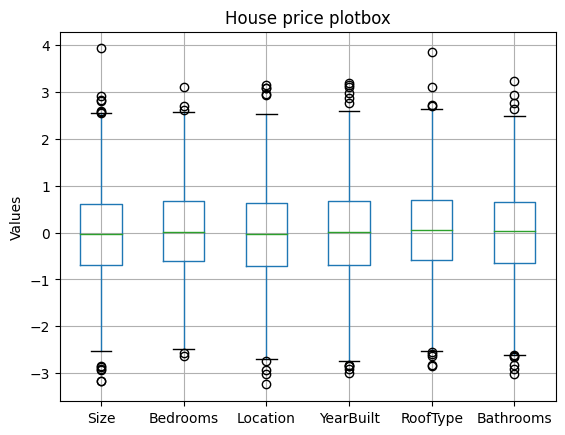

In [31]:
# Create a box plot for outlier detection
data.boxplot(column=['Size', 'Bedrooms','Location','YearBuilt','RoofType','Bathrooms'])
plt.title('House price plotbox')
plt.ylabel ('Values')

In [32]:
# Drop rows with NaN values
data = data.dropna()


In [33]:
# Check for missing values again
print (data.isnull().sum())

Size         0
Bedrooms     0
Bathrooms    0
Location     0
YearBuilt    0
RoofType     0
Price        0
dtype: int64


## Predictive Modeling using Linear Regression

- Split the Data
- Train a Linear Regressor
- Evaluate it on the test set using any metric of your choice

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score , r2_score

# Question 4:
# Split the data into features (X) and target variable (y)
x = data.drop('Price' , axis = 1)
y = data['Price']

# Split the data into training and test sets
x_train , x_test , y_train , y_test = train_test_split (x , y ,test_size = 0.2 , random_state=42)

# linear regression model
model = LinearRegression ()

# Fit the model on the training data
model.fit(x_train , y_train)

# Question 5:
# Evaluate the model on the test set
y_pred = model.predict(x_test)

# Calculate evaluation metrics use R2 score
r_squared = r2_score(y_test, y_pred)

print (r_squared)


0.9999788915641026


In [36]:
result = pd.DataFrame({'Actual': y_test, 'Predict' : y_pred})
result

,Actual,Predict
163,-218.447809,-218.860096
459,-301.522194,-301.545086
52,-1.762466,-2.848620
888,-137.878715,-137.882083
723,24.081623,25.021606
...,...,...
179,8.528345,8.210669
406,-15.953161,-16.588861
57,-62.403453,-62.171927
150,-50.111939,-49.295203
